# Imports

In [42]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns     ###didnt really use, can remove
import json
import time
import mysql.connector 
from mysql.connector import errorcode
import config_project1



# Connecting to MySQL

In [43]:
cnx = mysql.connector .connect(
    host = config_project1.host,
    user = config_project1.user,
    passwd = config_project1.password,
    database = 'Movies'
)
cursor = cnx.cursor()    

# Web Scrapping for Top 250 and Lowest 100 movies

In [44]:
#Top 250 rated movies
URL1 = "https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=4da9d9a5-d299-43f2-9c53-f0efa18182cd&pf_rd_r=BYZ5JEW58AJEXDTT58SP&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=topenglish&ref_=chttentp_ql_3"
r = requests.get(URL1)

#Buttom 100 rated movies
URL2 = "https://www.imdb.com/chart/bottom?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=4da9d9a5-d299-43f2-9c53-f0efa18182cd&pf_rd_r=GNJSYA49KTF016PSH5AD&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=topenglish&ref_=chttentp_ql_8"
r2 = requests.get(URL2) 

soup = BeautifulSoup(r.content+r2.content, 'html.parser')
soup
soup = BeautifulSoup(r.content, 'html5lib') 
print(soup.prettify()) 


<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <style>
   body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
  </style>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb Top 250 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {w

In [45]:
#flitering for the location of 'titleColumn' AND naming it movie_infos (movie's information is under this class)
soup.find_all( class_='titleColumn')

movie_infos = soup.find_all( class_='titleColumn')


In [46]:
# loop for all of the movie_ids

list_of_ids=[]

#for loop for the id
for i in range(len(movie_infos)):
    id_string = movie_infos[i].find('a')
    id_int = id_string['href'].split('/')[2]
    list_of_ids.append(id_int)

list_of_ids    

['tt0111161',
 'tt0068646',
 'tt0071562',
 'tt0468569',
 'tt0050083',
 'tt0108052',
 'tt0167260',
 'tt0110912',
 'tt0060196',
 'tt0137523',
 'tt0120737',
 'tt0109830',
 'tt1375666',
 'tt0080684',
 'tt7286456',
 'tt0167261',
 'tt0133093',
 'tt0073486',
 'tt0099685',
 'tt0047478',
 'tt0114369',
 'tt0317248',
 'tt0118799',
 'tt0102926',
 'tt0038650',
 'tt0076759',
 'tt0120815',
 'tt0245429',
 'tt0120689',
 'tt0110413',
 'tt0816692',
 'tt0056058',
 'tt0114814',
 'tt0110357',
 'tt0120586',
 'tt0088763',
 'tt0253474',
 'tt0027977',
 'tt0103064',
 'tt0054215',
 'tt1675434',
 'tt0172495',
 'tt0021749',
 'tt0407887',
 'tt2582802',
 'tt0064116',
 'tt0482571',
 'tt0034583',
 'tt0095327',
 'tt4154796',
 'tt0047396',
 'tt0095765',
 'tt6751668',
 'tt0078748',
 'tt0082971',
 'tt0209144',
 'tt0078788',
 'tt0032553',
 'tt0405094',
 'tt1853728',
 'tt4154756',
 'tt0081505',
 'tt4633694',
 'tt0050825',
 'tt0910970',
 'tt0119698',
 'tt0043014',
 'tt0057012',
 'tt0364569',
 'tt0051201',
 'tt1345836',
 'tt00

In [47]:
# intergrating the movie_ids with the main_url and apikey for GET
urls=[]
main_url = 'http://www.omdbapi.com/?i='  


for i in list_of_ids:
    urls.append(main_url + i + '&apikey=6d18c241')

            


# urls

In [48]:
# Checking reponse for information
test = requests.get('http://www.omdbapi.com/?i=tt0103064&apikey=6d18c241')
test.content

b'{"Title":"Terminator 2: Judgment Day","Year":"1991","Rated":"R","Released":"03 Jul 1991","Runtime":"137 min","Genre":"Action, Sci-Fi","Director":"James Cameron","Writer":"James Cameron, William Wisher","Actors":"Arnold Schwarzenegger, Linda Hamilton, Edward Furlong, Robert Patrick","Plot":"A cyborg, identical to the one who failed to kill Sarah Connor, must now protect her teenage son, John Connor, from a more advanced and powerful cyborg.","Language":"English, Spanish","Country":"USA","Awards":"Won 4 Oscars. Another 27 wins & 27 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BMGU2NzRmZjUtOGUxYS00ZjdjLWEwZWItY2NlM2JhNjkxNTFmXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"8.5/10"},{"Source":"Rotten Tomatoes","Value":"93%"},{"Source":"Metacritic","Value":"75/100"}],"Metascore":"75","imdbRating":"8.5","imdbVotes":"926,991","imdbID":"tt0103064","Type":"movie","DVD":"31 Mar 1998","BoxOffice":"$198,116,802","Production":"T

# Making of the tables:


In [49]:

cursor = cnx.cursor()
TABLES = {} #use dictionary to save diff create statements for each table

#Creating Table 'OMDb_Top_250_and_Low_100'

TABLES['OMDb_Top_250_and_Low_100'] = (
    "  CREATE TABLE OMDb_Top_250_and_Low_100 ("
    "  movie_id varchar(11) NOT NULL primary key,"
    "  movie_name varchar(200) not null,"
    "  rated varchar(20) not null,"
    "  imdb_rating float(2) not null,"
    "  imdb_total_votes int(7) not null,"
    "  metascore int(3) not null,"
    "  release_year int(5) not null,"
    "  runtime varchar(30) not null"
    
") ENGINE=InnoDB")


#Creating Table 'OMDb_Actors'


TABLES['OMDb_Actors'] = (
    "  CREATE TABLE OMDb_Actors ("
    "  movie_id varchar(11) NOT NULL,"
    "  movie_name varchar(200) NOT NULL,"
    "  actors varchar(255) not null"
") ENGINE=InnoDB")
    


#Creating Table 'OMDb_Directors'    
    
TABLES['OMDb_Directors'] = (
    "  CREATE TABLE OMDb_Directors ("
    "  movie_id varchar(11) NOT NULL,"
    "  movie_name varchar(200) NOT NULL,"
    "  director varchar(100) not null"
") ENGINE=InnoDB")
    

    
# Code for making each of the tables; if table exist will not make a new table    
    
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

Creating table OMDb_Top_250_and_Low_100: already exists.
Creating table OMDb_Actors: already exists.
Creating table OMDb_Directors: already exists.


# Populating the Main Table

In [27]:
# Loop to Get response for all the urls & Parsing results with the keys I need, and assigned to imdb list

imdb_db = []

for x in urls:

    
        page1 = requests.get(x)
        data = page1.json()
        keys = ['imdbID', 'Title', 'Rated','imdbRating','imdbVotes', 'Metascore', 'Year', 'Runtime']
        parsed_results = {key: (data[key] if key in data else 'Null') for key in keys}
        imdb_db.append(parsed_results)
        time.sleep(0.1)
        
    
    

In [50]:
# made a copy to not work with main list
imdb_db = imdb_db.copy()

In [51]:
# Making tuple list for Main Table      #### added 'IGNORE INTO' to skips duplicate responses to avoid error message

movies_lists = []
for movie in imdb_db:
    movies_tuples = (movie['imdbID'], movie['Title'], movie['Rated'], movie['imdbRating'], movie['imdbVotes'], movie['Metascore'], movie['Year'], movie['Runtime'])
    movies_lists.append(movies_tuples)
    
# Inserting into Main table
    
    insert_stmt = "INSERT IGNORE INTO OMDb_Top_250_and_Low_100 ( movie_id, movie_name, rated, imdb_rating, imdb_total_votes, metascore, release_year, runtime) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
    cursor.execute(insert_stmt, movies_tuples)
    cnx.commit()
    time.sleep(0.1)

# Populating Table Actors

In [30]:
# Loop to Get response for all the urls & Parsing results with the keys I need, and assigned to imdb_actorss list

imdb_actorss = []

for x in urls:

    
        page1 = requests.get(x)
        data = page1.json()
        keys = ['imdbID', 'Title', 'Actors']
        parsed_results = {key: (data[key] if key in data else 'Null') for key in keys}
        imdb_actorss.append(parsed_results)
        time.sleep(0.1)

In [31]:
# made a copy to not work with main list

imdb_actors = imdb_actorss.copy()

In [32]:
# spliting the actors that are in a list of list into separate actor names

for movie in imdb_actors:
    movie['Actors'] = movie['Actors'].split(',')
    movie['Actors'] = [i.strip() for i in movie['Actors']]

In [52]:
imdb_actors

[{'imdbID': 'tt0111161',
  'Title': 'The Shawshank Redemption',
  'Actors': ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']},
 {'imdbID': 'tt0068646',
  'Title': 'The Godfather',
  'Actors': ['Marlon Brando',
   'Al Pacino',
   'James Caan',
   'Richard S. Castellano']},
 {'imdbID': 'tt0071562',
  'Title': 'The Godfather: Part II',
  'Actors': ['Al Pacino', 'Robert Duvall', 'Diane Keaton', 'Robert De Niro']},
 {'imdbID': 'tt0468569',
  'Title': 'The Dark Knight',
  'Actors': ['Christian Bale',
   'Heath Ledger',
   'Aaron Eckhart',
   'Michael Caine']},
 {'imdbID': 'tt0050083',
  'Title': '12 Angry Men',
  'Actors': ['Martin Balsam', 'John Fiedler', 'Lee J. Cobb', 'E.G. Marshall']},
 {'imdbID': 'tt0108052',
  'Title': "Schindler's List",
  'Actors': ['Liam Neeson',
   'Ben Kingsley',
   'Ralph Fiennes',
   'Caroline Goodall']},
 {'imdbID': 'tt0167260',
  'Title': 'The Lord of the Rings: The Return of the King',
  'Actors': ['Noel Appleby', 'Ali Astin', 'Sean Astin', '

In [34]:
movie_list_actors = []
for movie in imdb_actors:
    
    for i , value in enumerate(movie['Actors']):
        actor_tuple = (movie['imdbID'], movie['Title'],movie['Actors'][i])
        movie_list_actors.append(actor_tuple)
            
movie_list_actors

[('tt0111161', 'The Shawshank Redemption', 'Tim Robbins'),
 ('tt0111161', 'The Shawshank Redemption', 'Morgan Freeman'),
 ('tt0111161', 'The Shawshank Redemption', 'Bob Gunton'),
 ('tt0111161', 'The Shawshank Redemption', 'William Sadler'),
 ('tt0068646', 'The Godfather', 'Marlon Brando'),
 ('tt0068646', 'The Godfather', 'Al Pacino'),
 ('tt0068646', 'The Godfather', 'James Caan'),
 ('tt0068646', 'The Godfather', 'Richard S. Castellano'),
 ('tt0071562', 'The Godfather: Part II', 'Al Pacino'),
 ('tt0071562', 'The Godfather: Part II', 'Robert Duvall'),
 ('tt0071562', 'The Godfather: Part II', 'Diane Keaton'),
 ('tt0071562', 'The Godfather: Part II', 'Robert De Niro'),
 ('tt0468569', 'The Dark Knight', 'Christian Bale'),
 ('tt0468569', 'The Dark Knight', 'Heath Ledger'),
 ('tt0468569', 'The Dark Knight', 'Aaron Eckhart'),
 ('tt0468569', 'The Dark Knight', 'Michael Caine'),
 ('tt0050083', '12 Angry Men', 'Martin Balsam'),
 ('tt0050083', '12 Angry Men', 'John Fiedler'),
 ('tt0050083', '12 An

In [ ]:
# Inserting into table Actors
    insert_stmt = "INSERT IGNORE OMDb_Actors ( movie_id,movie_name, actors) VALUES (%s, %s, %s)"
    cursor.executemany(insert_stmt, movie_list_actors)
    cnx.commit()
    time.sleep(0.1)

# Populating Table Directors

In [35]:
# Loop to Get response for all the urls & Parsing results with the keys I need

imdb_db_director = []

for x in urls:

    
        page1 = requests.get(x)
        data = page1.json()
        keys = ['imdbID', 'Title', 'Director']
        parsed_results = {key: (data[key] if key in data else 'Null') for key in keys}
        imdb_db_director.append(parsed_results)
        time.sleep(0.1)
        
    
    

In [36]:
imdb_db_director = imdb_db_director.copy()

In [37]:
imdb_db_director

[{'imdbID': 'tt0111161',
  'Title': 'The Shawshank Redemption',
  'Director': 'Frank Darabont'},
 {'imdbID': 'tt0068646',
  'Title': 'The Godfather',
  'Director': 'Francis Ford Coppola'},
 {'imdbID': 'tt0071562',
  'Title': 'The Godfather: Part II',
  'Director': 'Francis Ford Coppola'},
 {'imdbID': 'tt0468569',
  'Title': 'The Dark Knight',
  'Director': 'Christopher Nolan'},
 {'imdbID': 'tt0050083', 'Title': '12 Angry Men', 'Director': 'Sidney Lumet'},
 {'imdbID': 'tt0108052',
  'Title': "Schindler's List",
  'Director': 'Steven Spielberg'},
 {'imdbID': 'tt0167260',
  'Title': 'The Lord of the Rings: The Return of the King',
  'Director': 'Peter Jackson'},
 {'imdbID': 'tt0110912',
  'Title': 'Pulp Fiction',
  'Director': 'Quentin Tarantino'},
 {'imdbID': 'tt0060196',
  'Title': 'The Good, the Bad and the Ugly',
  'Director': 'Sergio Leone'},
 {'imdbID': 'tt0137523', 'Title': 'Fight Club', 'Director': 'David Fincher'},
 {'imdbID': 'tt0120737',
  'Title': 'The Lord of the Rings: The F

In [38]:
# spliting the directors that are in a list of list into separate director names
for movie in imdb_db_director:
    movie['Director'] = movie['Director'].split(',')
    movie['Director'] = [i.strip() for i in movie['Director']]

In [ ]:
movie_list_directors = []
for movie in imdb_db_director:
    
    for i , value in enumerate(movie['Director']):
        actor_tuple = (movie['imdbID'], movie['Title'],movie['Director'][i])
        movie_list_directors.append(actor_tuple)
            
movie_list_directors

In [ ]:
# Inserting into table Directors
    insert_stmt = "INSERT IGNORE INTO OMDb_Directors ( movie_id,movie_name, director) VALUES (%s, %s, %s)"
    cursor.executemany(insert_stmt, movie_list_directors)
    cnx.commit()
    time.sleep(0.1)

# Making DataFrames

In [53]:
#connecting to MySQL database
cnx = mysql.connector.connect(
    host = config_project1.host,
    user = config_project1.user,
    passwd = config_project1.password,
    database = 'Movies'
)
cursor = cnx.cursor()


# cursor.execute(  """SELECT * 
#                     FROM Movies.OMDb_Top_250_and_Low_100 l
#                     INNER JOIN Movies.OMDb_Actors  a where a.movie_id = l.movie_id
#                     order by a.Actors;""")
                        
# df = pd.DataFrame(cursor.fetchall())

# df.columns=['imdbID', 'Title', 'Rated','imdbRating','imdbVotes', 'Metascore', 'Year', 'Runtime','imdbID', 'Title', 'Actors']



# Actors in 8 or higher IMDb Rating

In [54]:
#calling the joined tables of Movies and Actors tables(w/ freq count of actors, actor name, and the actors avg imdb rating)
cursor.execute(  """SELECT a.actors,count(a.actors), avg(imdb_rating)
                    FROM Movies.OMDb_Top_250_and_Low_100 l
                    INNER JOIN Movies.OMDb_Actors  a 
                    ON a.movie_id = l.movie_id and imdb_rating >=8
                    GROUP BY a.actors
                    HAVING count(a.actors)>1
                    ORDER BY count(a.actors) desc limit 30
                    ;""")
#assigning database (pointed in MySql) as a dataframe using pandas                         
df_rating_freq = pd.DataFrame(cursor.fetchall())


#assigning the column names 
df_rating_freq.columns=['Actors','Frequency','ImdbRating']



In [55]:
df_rating_freq

,Actors,Frequency,ImdbRating
0,Robert De Niro,8,8.462500
1,Leonardo DiCaprio,6,8.350000
2,Harrison Ford,6,8.383333
3,Aamir Khan,6,8.283333
4,Tom Hanks,6,8.450000
5,Clint Eastwood,5,8.300000
6,Al Pacino,4,8.675000
7,Charles Chaplin,4,8.375000
8,Jack Nicholson,4,8.450000
9,James Stewart,4,8.375000


(2.75, 9)

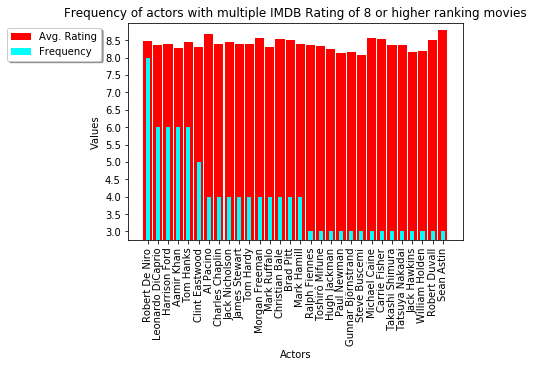

In [56]:
# Graph of frequency of Actors with a  Avg IMDB Movie rating of 8 or Higher ***  W/ OVERLAYING BARS

plt.bar(df_rating_freq.Actors,df_rating_freq.ImdbRating, width= 0.90, label = 'Avg. Rating', color = 'red')
plt.bar(df_rating_freq.Actors, df_rating_freq['Frequency'],  width= 0.40, label= 'Frequency', color = 'cyan')
plt.legend(loc='upper center', bbox_to_anchor=(-0.22, 1.00), fancybox=True, shadow=True)
plt.title('Frequency of actors with multiple IMDB Rating of 8 or higher ranking movies')
plt.xticks(list(df_rating_freq.Actors), rotation = 90)
plt.yticks(np.arange(3,9,0.5))
plt.xlabel('Actors')   
plt.ylabel('Values')
plt.ylim(2.75,9)




In [57]:
# summary of the DATAFRAME
df_rating_freq.describe()

,Frequency,ImdbRating
count,30.000000,30.000000
mean,3.966667,8.385139
std,1.272612,0.160443
min,3.000000,8.066667
25%,3.000000,8.300000
50%,4.000000,8.375000
75%,4.000000,8.490625
max,8.000000,8.800000


# Actors in movies with a IMDb Rating of 4.5 or lower

In [58]:
cursor.execute(  """SELECT a.actors,count(a.actors), avg(imdb_rating)
                    FROM Movies.OMDb_Top_250_and_Low_100 l
                    INNER JOIN Movies.OMDb_Actors  a 
                    ON a.movie_id = l.movie_id 
                    WHERE imdb_rating <=4.5
                    GROUP BY a.actors
                    HAVING count(a.actors)>1
                    ORDER BY count(a.actors) desc
                    ;""")
                        
df_low_rating_freq = pd.DataFrame(cursor.fetchall())

df_low_rating_freq.columns=['Actors','Frequency','ImdbRating']




In [59]:
df_low_rating_freq

,Actors,Frequency,ImdbRating
0,Stephen Dorff,3,3.00
1,Marlon Wayans,2,3.55
2,Nicolas Cage,2,3.40
3,Shaquille O'Neal,2,2.85
4,Chris Klein,2,3.40
5,Diedrich Bader,2,3.30
6,Skyler Shaye,2,2.45
7,Uma Thurman,2,3.75
8,Matt Lanter,2,2.65
9,Adam Campbell,2,2.60


(1, 4)

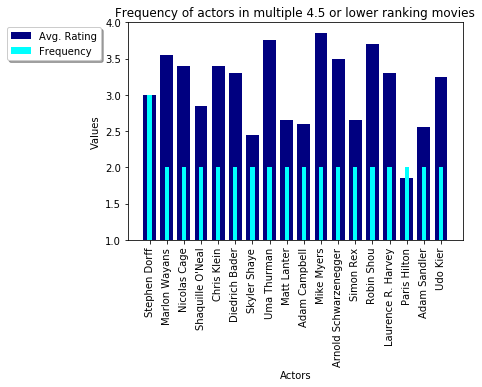

In [60]:
#Graph of frequency of Actors with a IMDB Movie rating of 8 or Higher

plt.bar(df_low_rating_freq.Actors,df_low_rating_freq.ImdbRating, width= 0.75, label = 'Avg. Rating', color = 'navy')
plt.bar(df_low_rating_freq.Actors, df_low_rating_freq['Frequency'],  width= 0.25, label= 'Frequency', color = 'cyan')
plt.title('Frequency of actors in multiple 4.5 or lower ranking movies')
plt.legend(loc='upper center', bbox_to_anchor=(-0.22, 1.00), fancybox=True, shadow=True)
plt.xticks(list(df_low_rating_freq.Actors), rotation = 90)
plt.yticks(np.arange(0,5,0.5))
plt.xlabel('Actors')   
plt.ylabel('Values')
plt.ylim(1,4)



# Avg revenue of top Actors

# """Not finished""" 

In [97]:
cursor.execute(  """SELECT l.actors, count(l.actors), avg(a.revenue)
                    FROM Movies.OMDb_Top_250_and_Low_100  m
                    INNER JOIN Movies.OMDb_Actors l ON m.movie_name = l.movie_name
                    INNER JOIN Movies.The_Movie_Db  a ON m.movie_name = a.movie_name
                    GROUP BY l.actors
                    ORDER BY avg(a.revenue) desc 
                    LIMIT 122
                    ;""")
                    ### had to limit 122 last 3 zero on revenue
    
df_rating_freq_all = pd.DataFrame(cursor.fetchall())

#naming the columns in new Dataframe
df_rating_freq_all.columns=['Actors', 'Frequency', 'Avg Revenue']

In [98]:
df_rating_freq_all


,Actors,Frequency,Avg Revenue
0,Robert Downey Jr.,2,2096861642.0000
1,Chris Evans,2,2096861642.0000
2,Mark Ruffalo,2,2096861642.0000
3,Chris Hemsworth,2,2096861642.0000
4,Patrick Macnee,1,1519557910.0000
5,Sean Connery,1,1519557910.0000
6,Ralph Fiennes,2,1430778955.0000
7,Michael Gambon,1,1342000000.0000
8,Alan Rickman,1,1342000000.0000
9,Daniel Radcliffe,1,1342000000.0000


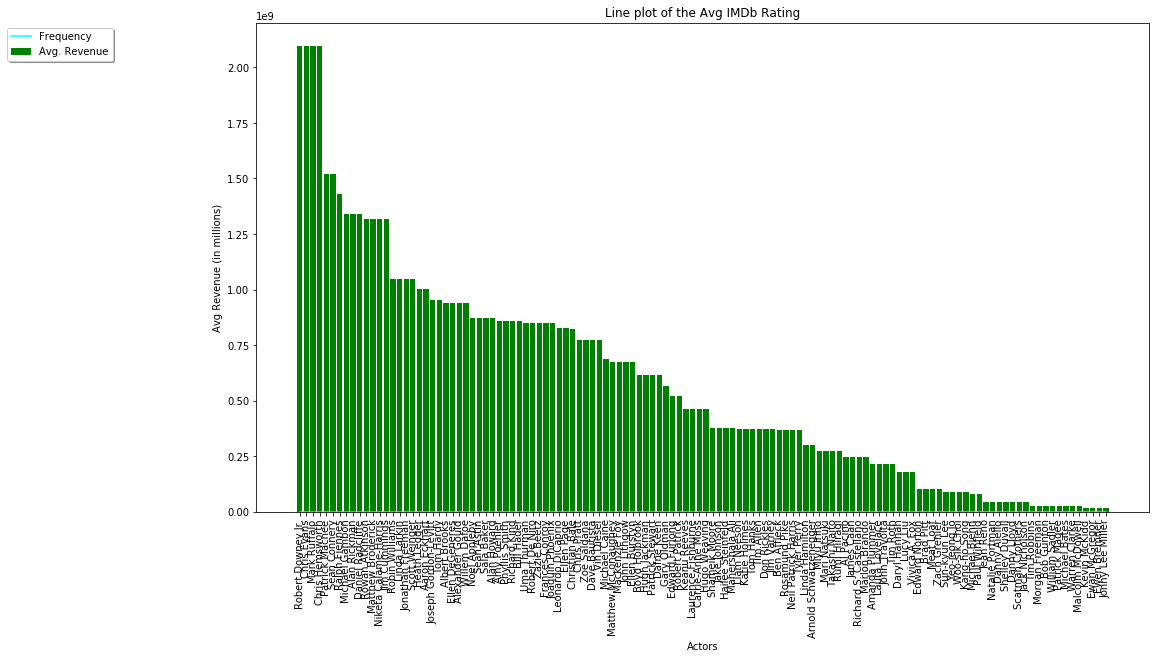

In [141]:
plt.bar(df_rating_freq_all.Actors, df_rating_freq_all['Avg Revenue'],  width= 0.8, label= 'Avg. Revenue', color = 'green')
plt.plot(df_rating_freq_all.Actors, df_rating_freq_all['Frequency'], label= 'Frequency', color = 'cyan')
plt.title('Line plot of the Avg IMDb Rating')
plt.legend(loc='upper center', bbox_to_anchor=(-0.22, 1.00), fancybox=True, shadow=True)
plt.xticks(list(df_rating_freq_all.Actors), rotation = 90)
# plt.yticks(np.arange(0,5,0.5))
plt.xlabel('Actors')   
plt.ylabel('Avg Revenue (in millions)')
# plt.ylim(1,4)
# plt.figure(figsize=(5000,200))
plt.show()


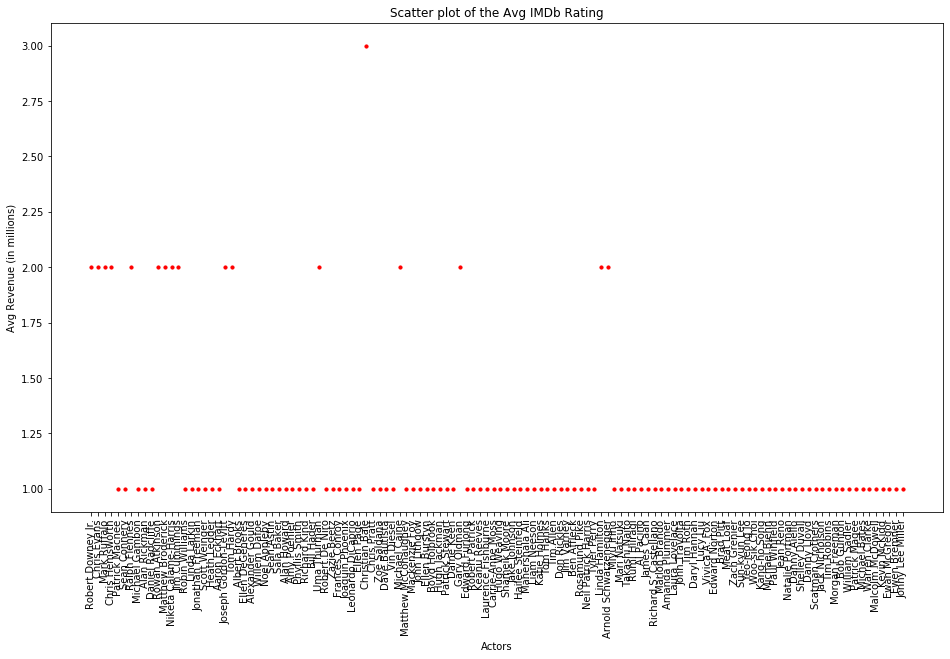

<Figure size 360000x14400 with 0 Axes>

In [145]:
plt.scatter(df_rating_freq_all.Actors, df_rating_freq_all['Frequency'], label= 'Frequency', s=10, c='red', alpha=1)
plt.title('Scatter plot of the Avg IMDb Rating')
plt.xlabel('Actors')
plt.ylabel('Avg Revenue (in millions)')
plt.xticks(list(df_rating_freq_all.Actors), rotation = 90)

plt.figure(figsize=(5000,200))
plt.show()